# Сущность модели "Дерево решений"



**Дерево решени**й (Решающее дерево) (Decision Tree, DT) – метод обучения с учителем, в основе которого лежит дерево (обычно бинарное), состоящее из узлов – решающих правил (предиктов) и листьев – решений.

В листьях будут находиться подмножества объектов, удовлетворяющие всем условиям соответствующей ветви.

Дерево решений можно рассматривать как кусочно-постоянную аппроксимацию, оно используется для классификации и регрессии.



**Этапы построения дерева решений**
1.    Выбор атрибута разбиения, по которому будет производиться разбиение в данном узле.
2.    Выбор критерия остановки обучения.
3.    Выбор метода отсечения ветвей (упрощения).
4.    Оценка точности построенного дерева.

1. **Выбор атрибута разбиения**
Атрибут разбиения должен разбить множество наблюдений в узле так, чтобы результирующие подмножества содержали примеры с одинаковыми метками класса, или были максимально приближены к этому, т.е. количество объектов из других классов в каждом из этих множеств было как можно меньше. Для этого существуют различные критерии, наиболее популярными из которых стали теоретико-информационный и статистический.

1.1. Теоретико-информационный критерий основан на понятии информационной энтропии, которая определяется по формуле:

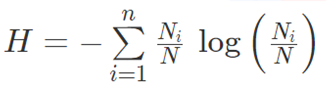

где n — число классов в исходном подмножестве,

Ni — число примеров i-го класса,

N — общее число примеров в подмножестве.


Энтропия может рассматриваться как мера неоднородности подмножества по представленным в нём классам. Когда классы представлены в равных долях и неопределённость классификации наибольшая, энтропия также максимальна. Если все примеры в узле относятся к одному классу, т.е. N=Ni, логарифм от единицы обращает энтропию в ноль.
Лучшим атрибутом разбиения Aj будет тот, который обеспечит максимальное снижение энтропии результирующего подмножества относительно родительского. На практике, однако, говорят не об энтропии, а о величине, обратной ей, которая называется информацией. Тогда лучшим атрибутом разбиения будет тот, который обеспечит максимальный прирост информации результирующего узла относительно исходного:

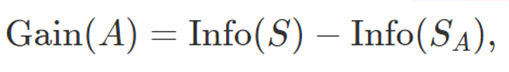

где Info(S) — информация, связанная с подмножеством S до разбиения,

Info(SA) — информация, связанная с подмножеством, полученными при разбиении по атрибуту A.

Таким образом, задача выбора атрибута разбиения в узле заключается в максимизации величины Gain(A), называемой приростом информации (от англ. gain — прирост, увеличение). Поэтому сам теоретико-информационный подход известен как критерий прироста информации. Он впервые был применён в алгоритме ID3, а затем в C4.5 и других алгоритмах.

1.2. **Статистический подход**

В основе статистического подхода лежит использование индекса Джини (назван в честь итальянского статистика и экономиста Коррадо Джини).

Индекс Джини показывает насколько часто случайно выбранный пример обучающего множества будет распознан неправильно, при условии, что целевые значения в этом множестве были взяты из определённого статистического распределения.
Индекс Джини фактически показывает расстояние между двумя распределениями – распределением целевых значений, и распределением предсказаний модели. Очевидно, что чем меньше данное расстояние, тем лучше работает модель.
Индекс Джини может быть рассчитан по формуле:

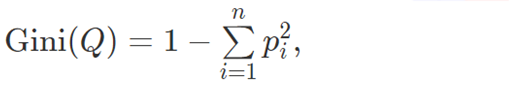

где Q – результирующее множество,

n – число классов в Q,

pi – вероятность i-го класса (выраженная как относительная частота примеров соответствующего класса).

Индекс Джини меняется от 0 до 1. При этом он равен 0, если все примеры Q относятся к одному классу, и равен 1, когда классы представлены в равных пропорциях и равновероятны. Тогда лучшим будет то разбиение, для которого значение индекса Джини будут минимальным.

2. **Критерий остановки обучения**

Теоретически, алгоритм обучения дерева решений будет работать до тех пор, пока в результате не будут получены абсолютно «чистые» подмножества, в каждом из которых будут примеры одного класса. Правда, возможно при этом будет построено дерево, в котором для каждого примера будет создан отдельный лист. Очевидно, что такое дерево окажется бесполезным, поскольку оно будет переобученным – каждому примеру будет соответствовать свой уникальный путь в дереве, а следовательно, и набор правил, актуальный только для данного примера.

Переобучение в случае дерева решений ведёт к тем же последствиям, что и для нейронной сети – точное распознавание примеров, участвующих в обучении и полная несостоятельность на новых данных. Кроме этого, переобученные деревья имеют очень сложную структуру, и поэтому их сложно интерпретировать.

Очевидным решением проблемы является принудительная остановка построения дерева, пока оно не стало переобученным. Для этого разработаны следующие подходы.

2.1. **Ранняя остановка** – алгоритм будет остановлен, как только будет достигнуто заданное значение некоторого критерия, например процентной доли правильно распознанных примеров. Единственным преимуществом подхода является снижение времени обучения. Главным недостатком является то, что ранняя остановка всегда делается в ущерб точности дерева, поэтому многие авторы рекомендуют отдавать предпочтение отсечению ветвей.

2.2. **Ограничение глубины дерева** – задание максимального числа разбиений в ветвях, по достижении которого обучение останавливается. Данный метод также ведёт к снижению точности дерева.

2.3. **Задание минимально допустимого числа примеров в узле** – запретить алгоритму создавать узлы с числом примеров меньше заданного (например, 5). Это позволит избежать создания тривиальных разбиений и, соответственно, малозначимых правил.

Все перечисленные подходы являются эвристическими, т.е. не гарантируют лучшего результата или вообще работают только в каких-то частных случаях. Поэтому к их использованию следует подходить с осторожностью. Каких-либо обоснованных рекомендаций по тому, какой метод лучше работает, в настоящее время тоже не существует. Поэтому аналитикам приходится использовать метод проб и ошибок.

3. **Отсечение ветвей**
Как было отмечено выше, если «рост» дерева не ограничить, то в результате будет построено сложное дерево с большим числом узлов и листьев. Как следствие оно будет трудно интерпретируемым. В то же время решающие правила в таких деревьях, создающие узлы, в которые попадают два-три примера, оказываются малозначимыми с практической точки зрения.

Гораздо предпочтительнее иметь дерево, состоящее из малого количества узлов, которым бы соответствовало большое число примеров из обучающей выборки. Поэтому представляет интерес подход, альтернативный ранней остановке – построить все возможные деревья и выбрать то из них, которое при разумной глубине обеспечивает приемлемый уровень ошибки распознавания, т.е. найти наиболее выгодный баланс между сложностью и точностью дерева.
К сожалению, это задача относится к классу NP-полных задач, что было показано Л. Хайфилем (L. Hyafill) и Р. Ривестом (R. Rivest), и, как известно, этот класс задач не имеет эффективных методов решения.
Альтернативным подходом является так называемое отсечение ветвей (pruning). Он содержит следующие шаги:

1)    **Построить полное дерево** (чтобы все листья содержали примеры одного класса).

2)    **Определить два показателя:**

·        **относительную точность** (Accuracy) – отношение числа правильно распознанных примеров к общему числу примеров,

·        **абсолютную ошибку** (Error rate) – число неправильно классифицированных примеров.

3)    **Удалить из дерева листья и узлы**, отсечение которых не приведёт к значимому уменьшению точности модели или увеличению ошибки.

**Отсечение ветвей** производится снизу вверх путём последовательного преобразования узлов в листья.

Преимуществом отсечения ветвей по сравнению с ранней остановкой является возможность поиска оптимального соотношения между точностью и понятностью дерева.

Недостатком является большее время обучения из-за необходимости сначала построить полное дерево.

**Извлечение правил**
Иногда даже упрощённое дерево решений все ещё является слишком сложным для визуального восприятия и интерпретации. В этом случае может оказаться полезным извлечь из дерева решающие правила и организовать их в наборы, описывающие классы.
Для извлечения правил нужно отследить все пути от корневого узла к листьям дерева. Каждый такой путь даст правило, состоящее из множества условий, представляющих собой проверку в каждом узле пути.
Визуализация сложных деревьев решений в виде решающих правил вместо иерархической структуры из узлов и листьев может оказаться более удобной для визуального восприятия.

**Преимущества алгоритма «Дерево решений»**
•    быстрый процесс обучения;
•    генерация правил в областях, где эксперту трудно формализовать свои знания;
•    извлечение правил на естественном языке;
•    интуитивно понятная классификационная модель;
•    высокая точность предсказания, сопоставимая с другими методами анализа данных (статистика, нейронные сети);
•    построение непараметрических моделей.

# Создание и обучение модели "Дерево решений" на Python

In [52]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neural_network import MLPClassifier        # Многослойный перцептрон
from sklearn.model_selection import train_test_split    # Разбивка на обуч. и тест. выборки
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Метрики
from sklearn.metrics import classification_report, confusion_matrix                 # Сводка по классификаци, матрица ошибок

In [13]:
df = pd.read_csv('/content/agaricus-lepiota3 (1).csv', sep = ';', header = 0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8122 entries, 0 to 8121
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8122 non-null   int64
 1   cap-shape                 8122 non-null   int64
 2   cap-surface               8122 non-null   int64
 3   cap-color                 8122 non-null   int64
 4   bruises?                  8122 non-null   int64
 5   odor                      8122 non-null   int64
 6   gill-attachment           8122 non-null   int64
 7   gill-spacing              8122 non-null   int64
 8   gill-size                 8122 non-null   int64
 9   gill-color                8122 non-null   int64
 10  stalk-shape               8122 non-null   int64
 11  stalk-root                8122 non-null   int64
 12  stalk-surface-above-ring  8122 non-null   int64
 13  stalk-surface-below-ring  8122 non-null   int64
 14  stalk-color-above-ring    8122 non-null 

In [15]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3


In [16]:
Y = df.iloc[:, 0]  # Target
X = df.iloc[:, 1:] # Features

**Разделение исходного набора на обучающий и тестовый**

Разделим набор данных на обучающую и тестовую выборки с помощью функции sklearn.model_selection.train_test_split(), принимающей в качестве параметров следующие основные аргументы:

•    *arrays – последовательность индексируемых элементов одинаковой длины (символ «*» используется для указания переменного числа аргументов),

•    test_size – размер тестовой выборки (от 0 до 1, где 1 – 100% от исходного набора данных),

•    random_state – случайное состояние (целое число). Используется, если необходимо одно и то же случайное разделение. Если random_state = None (изначальное значение), то при вызове функции разделения будут всегда разными.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

**Визуализация данных**

Построим точечные диаграммы по нескольким факторам, например с индексами 14, 15, 16

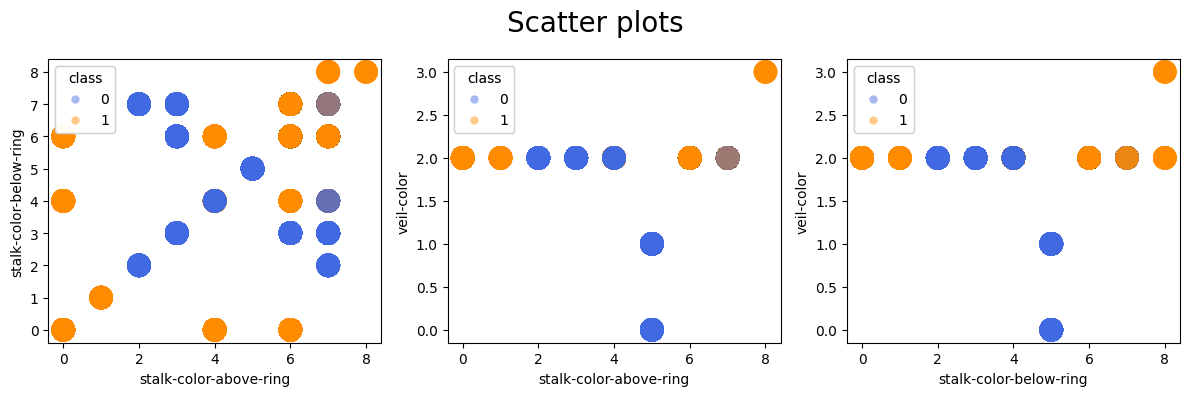

In [18]:
# Функция построения 3 точечных диаграмм на 1 рисунке

def scatter_1x3plots(df_plot, title = None):

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

    indexes_cols_pairs = [(1, 2), (1, 3), (2, 3)]



    # Создание цветовой карты

    cvals  = [0, 1]

    colors = ['royalblue', 'darkorange']

    norm=plt.Normalize(min(cvals), max(cvals))

    tuples = list(zip(map(norm, cvals), colors))

    cmap = mpl.colors.LinearSegmentedColormap.from_list('', tuples)



    # Построение 3 графиков на 1 рисунке

    for i in range(3):

        idx_col1 = indexes_cols_pairs[i][0]

        idx_col2 = indexes_cols_pairs[i][1]

        s = axs[i].scatter(x=df_plot.iloc[:, idx_col1],

                       y=df_plot.iloc[:, idx_col2],

                       alpha=0.41, s=290, linewidth=0,

                       c=df_plot.iloc[:, 0], cmap = cmap)

        axs[i].set_xlabel(df_plot.iloc[:, idx_col1].name)

        axs[i].set_ylabel(df_plot.iloc[:, idx_col2].name)

        plt.tight_layout()

        # Легенда

        legend1 = axs[i].legend(*s.legend_elements(),

                                loc='upper left', title='class')

        axs[i].add_artist(legend1)



    # Заголовок

    fig.suptitle(title, fontsize=20)

    plt.tight_layout()


df_1 = df.iloc[:, [0, 14, 15, 16]]
scatter_1x3plots(df_plot = df_1, title='Scatter plots')

Данные графики построены по всему набору данных. Построим графики отдельно для обучающего и тестового наборов:

In [22]:
X_train.insert(0, 'class',  Y_train)

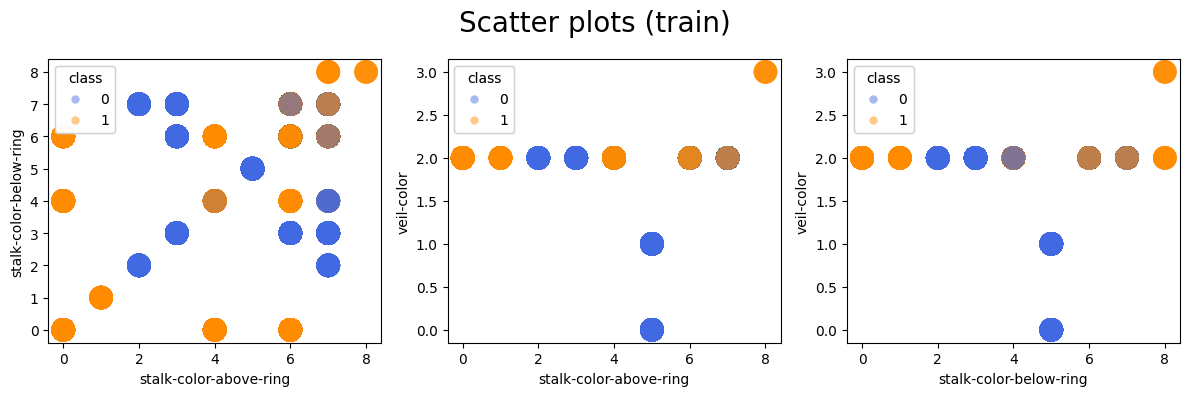

In [24]:
df_1 = X_train.iloc[:, [0, 14, 15, 16]]
scatter_1x3plots(df_plot = df_1, title='Scatter plots (train)')

In [25]:
X_test.insert(0, 'class',  Y_test)

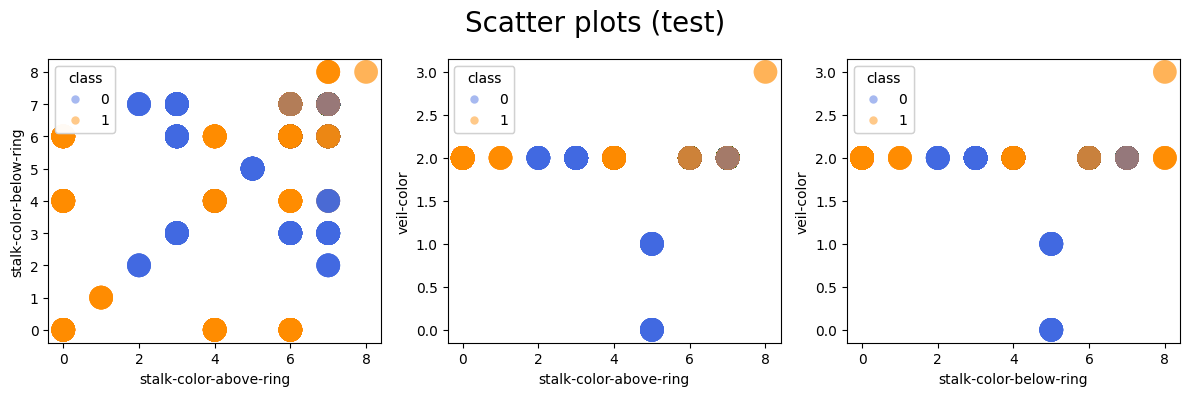

In [26]:
df_1 = X_test.iloc[:, [0, 14, 15, 16]]
scatter_1x3plots(df_plot = df_1, title='Scatter plots (test)')

In [30]:
X_train = X_train.drop('class', axis = 1)
X_test = X_test.drop('class', axis = 1)

Как можно заметить, графики по двум наборам данных отличаются незначительно, лишь в некоторых позициях маркеры поменяли свой цвет.

**Создание модели дерева решений**

Создать модель дерева решений как модель-классификатор (Decision Tree Classifier) можно с помощью библиотеки scikit-learn и класса sklearn.tree.DecisionTreeClassifier. Некоторые основные параметры (атрибуты экземпляра класса, значения которых указывается при вызове метода-конструктора в качестве значений аргументов) представлены ниже:

    •    criterion – функция для измерения качества разделения, по умолчанию равная 'gini'. Имеется возможность указать функию информационной энтропии 'entropy' или 'log_loss';
    •    splitter – стратегия, используемая для выбора разделения на каждом узле. По умолчанию указано значение 'best', также можно указать 'random';
    •    max_depth – максимальная глубина дерева.  По умолчанию указано значение 'None', в этом случае то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать менее min_samples_split выборок.
    •    min_samples_split – минимальное число примеров, необходимое для разделения внутреннего узла, по умолчанию равное 2;
    •    min_samples_leaf – минимальное число примеров, которое должно находиться в листовом узле, по умолчанию равное 1;
    •    max_features – число переменных, которые будут учитываться при поиске лучшего разделения. По умолчанию max_features = None, что означает max_features = n_features, т.е. равенство числу переменных в наборе данных, переданным методом fit() при обучении модели. Допустимы также значения:
        'sqrt' – соответствует max_features = sqrt(n_features);
        'log2' – соответствует max_features = log2(n_features);
        'auto' – соответствует max_features = sqrt(n_features) при классификации и max_features = n_features при регрессии.
    •    max_leaf_nodes – максимальное число узлов в дереве, по умолчанию равное None, т.е. без ограничений;


Как видно, число гиперпараметров для дерева решений достаточно велико и не существует универсальных правил, на основе которых можно строить наиболее эффективные деревья, устанавливая те или иные значения для гиперпараметров. Обычно значения гиперпараметров подбираются путем проб и ошибок, однако существует специальные инструменты, позволяющие автоматизировать процесс оптимизации гиперпараметров.

**Оптимизация гиперпараметров** происходит на основе одной из двух техник:

•    поиск по сетке,
•    случайный поиск.

**Поиск по сетке** (Grid search) – формирование сетки (т.е. матрицы, таблицы) гиперпараметров с их возможными значениями и последующий поиск (построение модели и оценка качества) по этой сетке такой комбинации значений гиперпараметров, при которой обеспечивается наилучшая производительность модели, ее наилучшее качество.

Другими словами, исследователь задает ряд интересующих его гиперпараметров и ряд значений для каждого из них, затем происходит построение множества моделей с различными комбинациями значений этих гиперпараметров, после чего отбирается лучшая из построенных моделей.

**Случайный поиск** (Random search, Randomized search) – аналогичен поиску по сетке, однако в этом случае строится n моделей со случайными комбинациями гиперпараметров, где n определяется исследователем. Применяется, если число гиперпараметров и их возможных значений слишком велико, чтобы можно было учесть все возможные комбинации гиперпараметров.

В scikit-learn показателем качества модели при поиске по сетке или случайном поиске являет показатель кросс-валидации (cross-validation score, cv score).

**Кросс-валидация** (Перекрестная проверка) (Cross-validation) –методика обучения и оценки модели, которая разбивает данные на несколько секций и обучает несколько алгоритмов на этих секциях.

**Методы кросс-валидации**:

•    **Hold-out** – разделение набора данных на обучающий набор (train) и тестовый набор (test) случайным образом.

•    **Стратификация** (Stratification) – разделение набора данных на обучающий набор (train) и тестовый набор (test) случайным образом, но с сохранением соотношения классов, которое присутствует в исходном наборе данных.

•    **k-Fold** – метод, реализующий hold-out в соответствии со следующим алгоритмом:

1)    исследователем выбирается целое число k (обычно от 5 до 10 и менее числа сэмплов – наблюдений в исходном наборе данных);

2)    исходный набор данных разделяется на k одинаковых частей – фолдов (областей), при этом последняя часть может иметь отличный размер, если равномерное разделение невозможно;

3)    модель обучается k раз, при этом каждый раз один фолд является тестовым набором, а остальные фолды – обучающим набором. Тестовый фолд каждый раз меняется, т.е. после обучения k раз каждый из фолдов один раз играл роль тестового набора, а остальные разы входил в обучающий набор. После такого обучения имеется k оценок модели по каждому тестовому фолду, т.е. результат обучения можно рассматривать как k разных экземпляров модели, каждый из которых обучен на своем тренировочном наборе (тренировочных фолдах).

4)    рассчитывается финальная оценка модели путем усреднения k оценок, либо тестирования модели на новом отложенном тестовом наборе (в этом случае поступают разными способами: делают предсказания путем усреднения k предсказаний и рассчитывают оценку; выбирают экземпляр модели с наилучшей оценкой; заново обучают модель, но уже на всех k фолдах).

**Метод k-Fold** даёт более надёжную оценку качества модели, чем hold-out, так как обучение и тест модели происходят на разных подмножествах исходного датасета. Однако проведение итераций обучения и теста может быть вычислительно затратным, и поэтому метод обычно применяют либо когда данных достаточно мало, либо при наличии большого количества вычислительных ресурсов, позволяющих проводить все итераций параллельно. В реальных задачах данных зачастую достаточно много для того, чтобы hold-out давал хорошую оценку качества модели, поэтому k-Fold в больших задачах применяется не очень часто.

•   **Leave-one-out** (LOO) – является частным случаем метода k-Fold: в нём каждый фолд состоит ровно из одного семпла. Этот метод может понадобиться в случае, если у вас очень мало данных (например, в задаче сегментации клеток на изображениях с оптического микроскопа) и вы хотите использовать максимальное их количество для обучения модели: для валидации на каждой итерации методу требуется всего один семпл. Однако и итераций будет столько, сколько семплов в данных, поэтому метод неприменим для средних и больших задач.

•    **Stratified k-Fold** – метод k-Fold, использующий стратификацию при разбиении на фолды: каждый фолд содержит примерно такое же соотношение классов, как и всё исходное множество. Такой подход может потребоваться в случае, например, очень несбалансированного соотношения классов, когда при обычном hold-out некоторые фолды могут либо вообще не содержать семплов каких-то классов, либо содержать их слишком мало.

Поиск по сетке реализуется с помощью класса sklearn.model_selection.GridSearchCV, который имеет следующие основные параметры:

•    *estimator* – модель машинного обучения (объект estimator). В качестве такого объекта может выступать, например, экземпляр класса sklearn.tree.DecisionTreeClassifier;

•    *param_grid* – сетка с гиперпараметрами их значениями в виде словаря Python или списка словарей;

•    *scoring* – метрика для оценки качества модели, которая в промежуточных результатах будет отображаться как score. По умолчанию scoring = None, в этом случае используется метрика Accuracy.

•    *cv* – определяет стратегию разделения набора данных для кросс-валидации. По умолчанию cv = None. Возможные значения:

- None – используется метод Stratified k-Fold, число фолдов равно 5;

- любое целое число – используется метод Stratified k-Fold с установленным числом фолдов.

•    *verbose* – целочисленная переменная, отвечающая за отображение промежуточных результатов обучения в консоль. По умолчанию verbose = False. Возможные значения:

- False – промежуточные результаты не отображаются

- целые числа 1, 2 или 3 – определяют, насколько подробно будут отображаться промежуточные результаты.

Построим модель дерева решений с оптимальными гиперпараметрами на основе процедуры поиска по сетке:

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [34]:
# Создание модели дерева решений
dt = DecisionTreeClassifier(max_leaf_nodes = None, random_state = 0)

# Поиск оптимальных гиперпараметров через "Поиск по сетке"
param_grid = {'max_depth': [3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3],
              'max_features': [None, 'sqrt', 'log2']}
GSCV_dt = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10, verbose = 3)
GSCV_dt.fit(X_train, Y_train)
print('GSCV_dt.best_params_:', GSCV_dt.best_params_)
model_dt = GSCV_dt.best_estimator_        # Сохранение модели с оптимальными гиперпараметрами

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.966 total time=   0.0s
[CV 2/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.948 total time=   0.0s
[CV 3/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.957 total time=   0.0s
[CV 4/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.958 total time=   0.0s
[CV 5/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.955 total time=   0.0s
[CV 6/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.957 total time=   0.0s
[CV 7/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.963 total time=   0.0s
[CV 8/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.958 total time=   0.0s
[CV 9/10] END max_depth=3, max_features=None, min_samples_leaf=1;, score=0.966 total time=   0.0s
[CV 10/10] END max_depth=3, max_features=None, min_samp

На последней строке мы видим оптимальные значения для трех рассматриваемых гиперпараметров. Чтобы вывести больше информации про процесс поиска по сетке, введем команду, которая отобразит словарь:

In [35]:
GSCV_dt.cv_results_

{'mean_fit_time': array([0.01193616, 0.01277745, 0.01290631, 0.00844898, 0.01092615,
        0.01664927, 0.00918343, 0.00794864, 0.00767896, 0.01033912,
        0.01007764, 0.01072726, 0.00552912, 0.00557523, 0.0051559 ,
        0.00542371, 0.00557401, 0.00605299, 0.01046724, 0.01114786,
        0.01073992, 0.00639305, 0.00695231, 0.00630567, 0.0057873 ,
        0.00613325, 0.00580001, 0.01073399, 0.01157048, 0.01098325,
        0.00612907, 0.00661597, 0.0057174 , 0.00617726, 0.00620997,
        0.00559058]),
 'std_fit_time': array([0.00137544, 0.00161955, 0.00195449, 0.00317598, 0.00421842,
        0.00579702, 0.00273708, 0.00165484, 0.00303568, 0.00140573,
        0.00075495, 0.00198341, 0.0004395 , 0.00068119, 0.00016717,
        0.00041792, 0.00093893, 0.00122081, 0.00079489, 0.00122597,
        0.00056318, 0.00091947, 0.00157473, 0.00093119, 0.00017777,
        0.00066556, 0.00038   , 0.00015103, 0.00096232, 0.0006343 ,
        0.00092407, 0.00095884, 0.00017007, 0.00067721, 0.000

Внизу, по ключу 'rank_test_score' мы видим ранги для средних метрик, т.е. наилучшие метрики имеют ранг 1 и соответствуют комбинациям гиперпараметров 28, 29, 30. По ключу 'mean_test_score' мы видим средние значения метрик.
По ключу 'params' мы можем увидеть комбинации гипераметров, позволившими получить наилучшие метрики:

In [36]:
GSCV_dt.cv_results_['rank_test_score']

array([22, 22, 22, 31, 31, 31, 31, 31, 31,  7,  7,  7, 25, 25, 25, 25, 25,
       25,  4,  4,  4, 10, 10, 10, 10, 10, 10,  1,  1,  1, 16, 16, 16, 16,
       16, 16], dtype=int32)

In [37]:
GSCV_dt.cv_results_['mean_test_score']

array([0.95813488, 0.95813488, 0.95813488, 0.89548536, 0.89548536,
       0.89548536, 0.89548536, 0.89548536, 0.89548536, 0.9772201 ,
       0.9772201 , 0.9772201 , 0.94166244, 0.94166244, 0.94166244,
       0.94166244, 0.94166244, 0.94166244, 0.97922058, 0.97922058,
       0.97922058, 0.97367927, 0.97367927, 0.97367927, 0.97367927,
       0.97367927, 0.97367927, 0.99492023, 0.99492023, 0.99492023,
       0.96690648, 0.96690648, 0.96690648, 0.96690648, 0.96690648,
       0.96690648])

In [38]:
GSCV_dt.cv_results_['params']

[{'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1},
 {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2},
 {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 3},
 {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1},
 {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2},
 {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3},
 {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1},
 {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2},
 {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 3},
 {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1},
 {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2},
 {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3},
 {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1},
 {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2},
 {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3},
 {'max_depth': 4, 'max

**Обучение модели дерева решений**

Обучение модели реализуется с помощью метода fit().

Построить график дерева решений можно с помощью функции sklearn.tree.plot_tree(), при этом параметр filled позволяет раскрасить узел в соответствии с цветом класса (если в узел входят представители нескольких классов, то цвет меняется в соответствии с цветовым градиентом):

[Text(0.4114583333333333, 0.9285714285714286, 'x[8] <= 3.5\ngini = 0.499\nsamples = 6497\nvalue = [3381, 3116]'),
 Text(0.1875, 0.7857142857142857, 'x[19] <= 3.5\ngini = 0.277\nsamples = 2631\nvalue = [437, 2194]'),
 Text(0.08333333333333333, 0.6428571428571429, 'x[10] <= 0.5\ngini = 0.219\nsamples = 471\nvalue = [412, 59]'),
 Text(0.041666666666666664, 0.5, 'gini = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 412\nvalue = [412, 0]'),
 Text(0.2916666666666667, 0.6428571428571429, 'x[20] <= 4.5\ngini = 0.023\nsamples = 2160\nvalue = [25, 2135]'),
 Text(0.20833333333333334, 0.5, 'x[12] <= 0.5\ngini = 0.008\nsamples = 2124\nvalue = [9, 2115]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[1] <= 2.5\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.20833333333333334, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.25, 0.35714285714285715, 'gini =

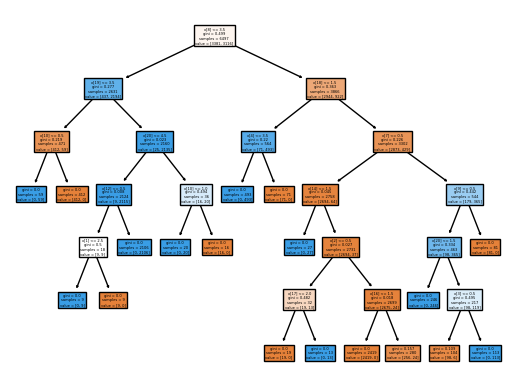

In [40]:
# Обучение модели и получение прогноза

model_dt.fit(X_train, Y_train)
plot_tree(model_dt, filled = True)

Настроим дерево так, чтобы оно отображалось более читабельно:

[Text(0.4114583333333333, 0.9285714285714286, 'x[8] <= 3.5\ngini = 0.499\nsamples = 6497\nvalue = [3381, 3116]'),
 Text(0.1875, 0.7857142857142857, 'x[19] <= 3.5\ngini = 0.277\nsamples = 2631\nvalue = [437, 2194]'),
 Text(0.08333333333333333, 0.6428571428571429, 'x[10] <= 0.5\ngini = 0.219\nsamples = 471\nvalue = [412, 59]'),
 Text(0.041666666666666664, 0.5, 'gini = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 412\nvalue = [412, 0]'),
 Text(0.2916666666666667, 0.6428571428571429, 'x[20] <= 4.5\ngini = 0.023\nsamples = 2160\nvalue = [25, 2135]'),
 Text(0.20833333333333334, 0.5, 'x[12] <= 0.5\ngini = 0.008\nsamples = 2124\nvalue = [9, 2115]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[1] <= 2.5\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.20833333333333334, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.25, 0.35714285714285715, 'gini =

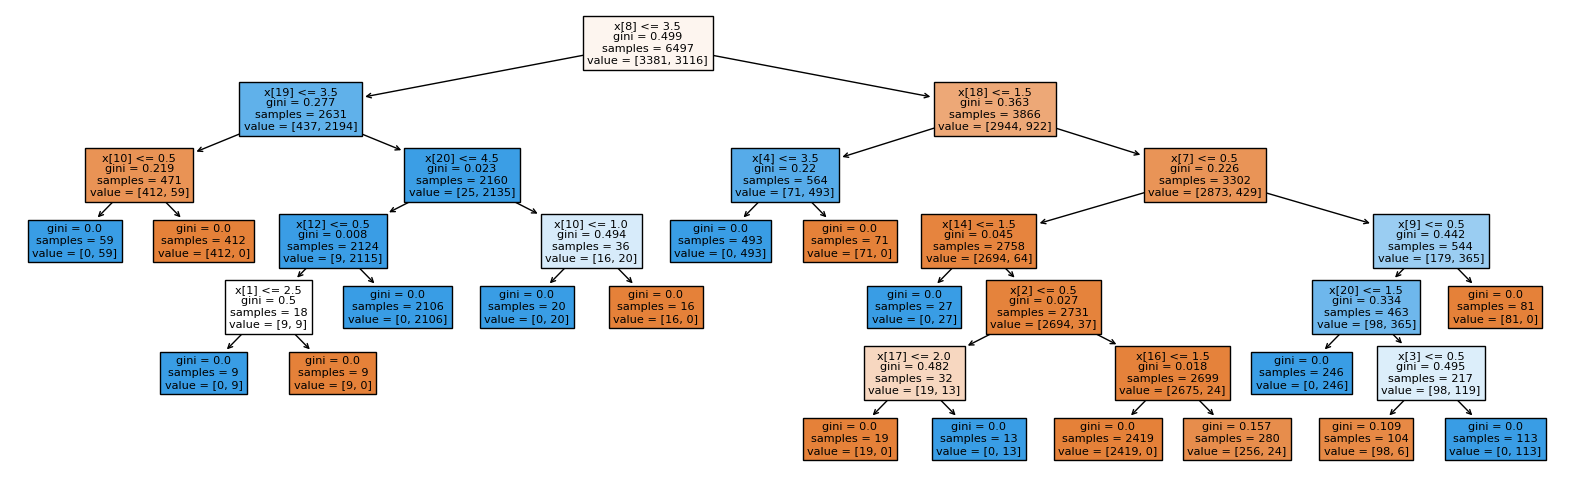

In [41]:
plt.figure(figsize = (20, 6))
plot_tree(model_dt, filled = True)

Рассмотрим корневой узел и два узла-потомка:

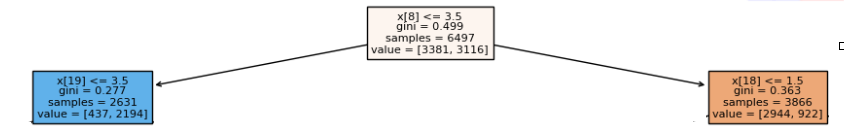

В дереве каждый нелистовой узел имеет 4 строки текстовой информации:

•    правило (например, в корневом узле правило x[8] <= 3.5 означает, что, если значение фактора с индексом 8 превышает 3,5 (True), то объект переходит к левому потомку текущего узла, иначе (False) – к правому;

•    значение атрибута разбиения (в нашем случае выбран gini – индекс Джини);

•    samples – число сэмплов (наблюдений, объектов) всего в текущем узле;

•    value – число сэмплов в каждом классе.

Например, в корневом узле всего 6497 объекта, к первому классу с меткой 0 относятся 3381 объекта, ко второму классу с меткой 1 – 3116 объектов. Это соответствует размерам классов в обучающем наборе Y_train:

In [43]:
len(Y_train)

6497

In [44]:
len(Y_train[Y_train == 0])

3381

In [45]:
len(Y_train[Y_train == 1])

3116

По value в листовом узле определяется класс, к которому относится объект: объекту присваивается метка того класса, в который входит наибольшее число объектов (например, в корневом узле в класс 0 входит больше всего объектов).

В соответствии с правилом (условием) «x[8] <= 3.5» из корневого узла к левому потомку перешел 2631 объект, к правому – 3866, что можно проверить по обучающему набору X_train:

In [46]:
len(X_train[X_train.iloc[:, 8] <= 3.5])

2631

In [47]:
len(X_train[X_train.iloc[:, 8] > 3.5])

3866

Рассмотрит левое поддерево относительно корневого узла:

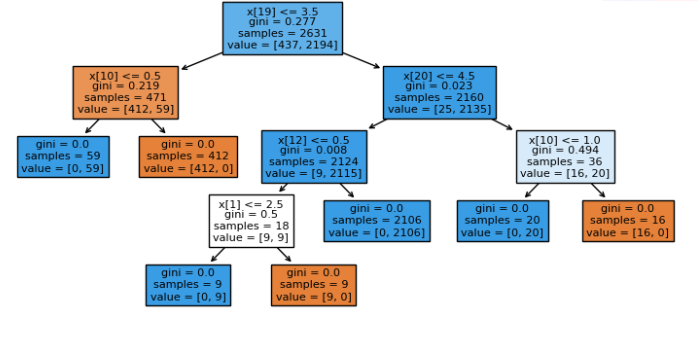

Мы видим 7 листовых узлов. По ним видно как распределялся 2631 объект на два класса в соответствии с правилами: 39 + 20 + 412 + 20 + 9 + 2115 + 16 = 2631.

Например, крайний левый листовой узел относит 39 объектов к классу 1, если одновременно выполняются 3 условия: «x[8] <= 3.5», «x[19] <= 3.5», «x[18] <= 1.5».

Аналогичным образом в правом поддереве распределяются по двум классам 3866 объектов:

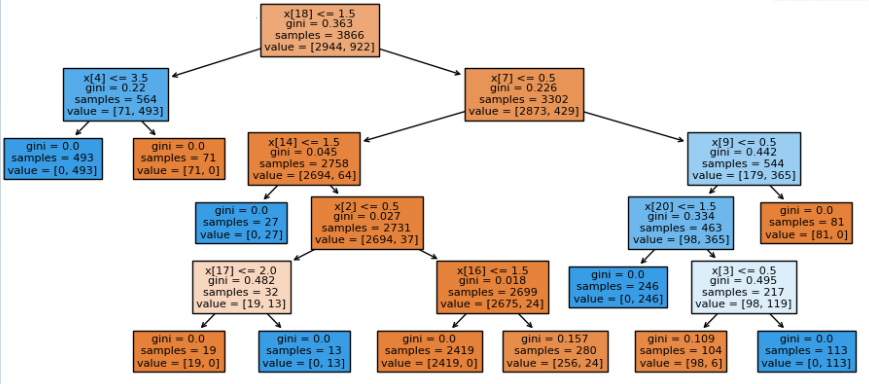

**Тестирование и оценка качества модели дерева решений**

С помощью метода predict() построим прозгноз по тестовому набору данных и сформируем матрицы ошибок для бинарной классификации:

In [50]:
#Тестирование модели(прогноз)
Y_train_pred = model_dt.predict(X_train)    # Прогноз для обучающей выборки
Y_test_pred = model_dt.predict(X_test)      # Прогноз для тестовой выборки

# Матрицы ошибок
cm_train = confusion_matrix(Y_train, Y_train_pred)
cm_test = confusion_matrix(Y_test, Y_test_pred)

# Таблицы для матриц ошибок в виде тепловых карт
labels = ['0', '1']
df_cm_train = pd.DataFrame(cm_train, index = labels, columns = labels)
df_cm_test = pd.DataFrame(cm_test, index = labels, columns = labels)

print('\ndf_cm_train:', df_cm_train, sep = '\n')
print('\ndf_cm_test:', df_cm_test, sep = '\n')


df_cm_train:
      0     1
0  3381     0
1    30  3086

df_cm_test:
     0    1
0  826    0
1   10  789


Матрицы ошибок мы можем представить в виде тепловых карт:

Text(0.5, -7.277777777777782, 'Predicted class labels')

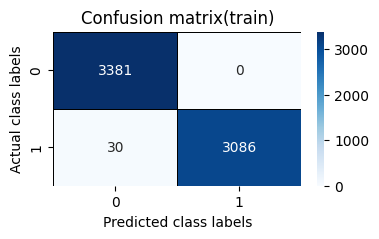

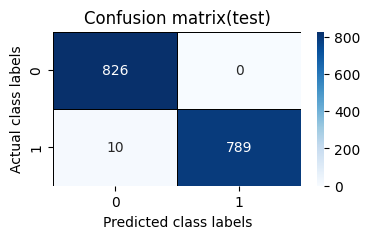

In [53]:
# Матрица ошибок в виде тепловой карты (обучающая выборка)
figure1 = plt.figure(1, figsize = (4, 2))      # Рисунок (лист для графика)
ax = plt.axes()                                # Оси
sns.heatmap(df_cm_train, figure = figure1, ax = ax,
            annot = True, fmt = '.0f', cmap = 'Blues',
            linewidth = .5, linecolor = 'black')
ax.set_title('Confusion matrix(train)')
ax.set_ylabel('Actual class labels')
ax.set_xlabel('Predicted class labels')

# Матрица ошибок в виде тепловой карты (тестовая выборка)
figure2 = plt.figure(2, figsize = (4, 2))      # Рисунок (лист для графика)
ax = plt.axes()                                # Оси
sns.heatmap(df_cm_test, figure = figure2, ax = ax,
            annot = True, fmt = '.0f', cmap = 'Blues',
            linewidth = .5, linecolor = 'black')
ax.set_title('Confusion matrix(test)')
ax.set_ylabel('Actual class labels')
ax.set_xlabel('Predicted class labels')

Как видно, по тестовой выборке модель правильно отнесла 826 объектов к классу 0, 789 объектов – к классу 1 и 10 объектов ошибочно отнесла к классу 0.


**Рассчитаем метрики:**

In [56]:
accuracy_train = accuracy_score(Y_train, Y_train_pred)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
precision_train = precision_score(Y_train, Y_train_pred)
precision_test = precision_score(Y_test, Y_test_pred)
recall_train = recall_score(Y_train, Y_train_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_train = f1_score(Y_train, Y_train_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print('accuracy (train)', accuracy_train)
print('accuracy (test)', accuracy_test)
print('precision (train)', precision_train)
print('precision (test)', precision_test)
print('recall (train)', recall_train)
print('recall (test)', recall_test)
print('f1 (train)', f1_train)
print('f1 (test)', f1_test)


accuracy (train) 0.9953824842234877
accuracy (test) 0.9938461538461538
precision (train) 1.0
precision (test) 1.0
recall (train) 0.9903722721437741
recall (test) 0.9874843554443054
f1 (train) 0.9951628506933248
f1 (test) 0.9937027707808564


Полученные высокие значения метрик свидетельствуют о высоком качестве построенной модели дерева решений.
Построим точечные диаграммы на основе прогнозов модели (в нашем случае прогноз означает цвет маркера):

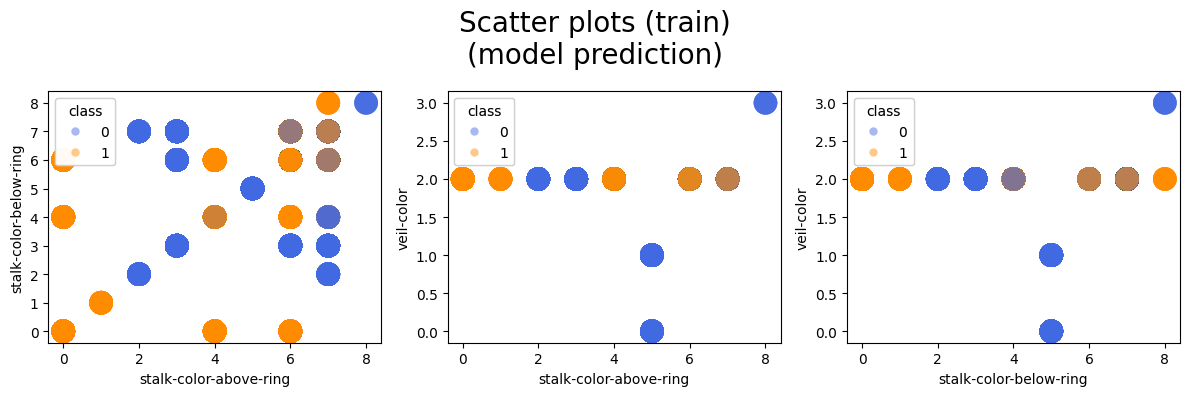

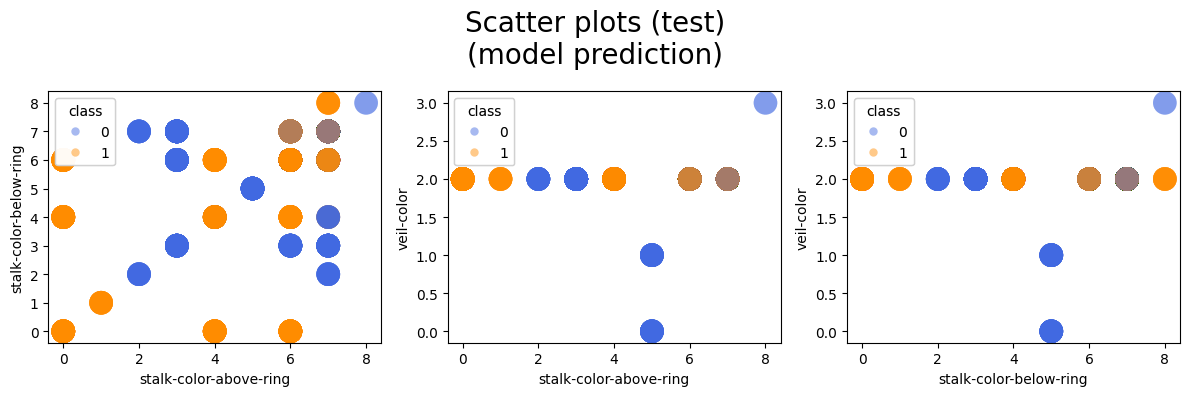

In [60]:
# Объединение Y_train, X_train
df_2_train = pd.DataFrame(Y_train_pred)
df_2_train = df_2_train.join(X_train.reset_index(drop = True))
df_2_train = df_2_train.iloc[:, [0, 14, 15, 16]]      # Выбор факторов
scatter_1x3plots(df_plot = df_2_train, title = 'Scatter plots (train)\n(model prediction)')   # График

# Объединение Y_test, X_test
df_2_test = pd.DataFrame(Y_test_pred)
df_2_test = df_2_test.join(X_test.reset_index(drop = True))
df_2_test = df_2_test.iloc[:, [0, 14, 15, 16]]        # Выбор факторов
scatter_1x3plots(df_plot = df_2_test, title = 'Scatter plots (test)\n(model prediction)')     # График

Сравним графики с прошлыми графиками, построенными ранее по фактическим (исходным) данным:

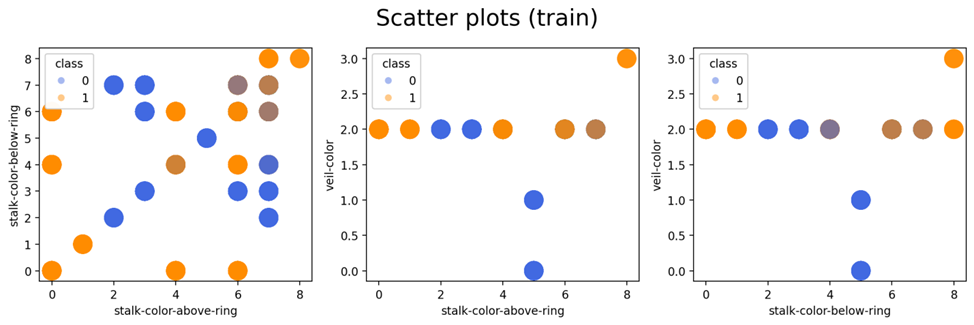

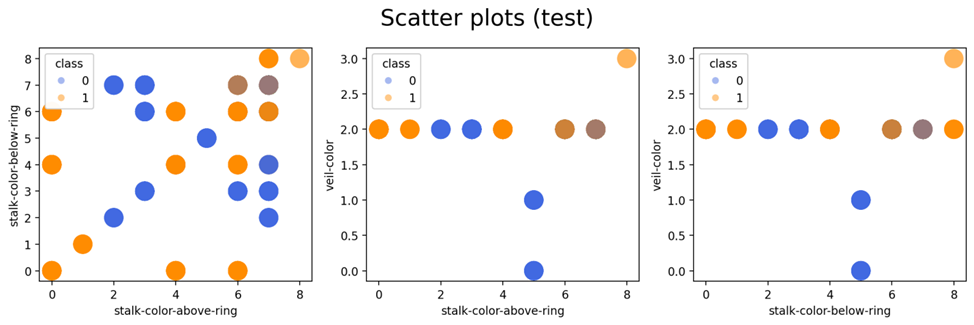

Как видно, цвета маркеров на графиках по прогнозам и фактическим данным почти не отличаются, лишь в некоторых позициях (например, в правом верхнем углу) маркеры имеют разные цвета, что говорит об ошибочном прогнозе для объектов с соответствующими значениями факторов.